## Импортируем Библиотеки, которые нам понадобятся

In [1]:
import matplotlib.pyplot as plt

from celluloid import Camera
from IPython.display import Image

import random
#from random import random
import numpy as np

import math

import colorsys

from statistics import mean

import time as tm


## Глобальные константы

In [2]:
GravityConst = 6.67E-11

## Создание класса Object

Для начала нужно определиться, какие функции и обязанности возьмёт на себя класс Object

1. Object должен нести в себе параметры тела, а именно: массу, скорость, положение в пространстве и собсвтвенный радиус
2. Object должен уметь считать силу гравитационного взаимодействия с другими Oject-ами
3. Object должен уметь вычислять энергия взаимодействия с другим Object-ом
4. Object сам ответсвеннен за запись своей траектории. Важно, что необязательно записывать каждую точку траектории, можно делать это например, когда угол откланения от траектории становится больше какого-то значения
5. Object должен уметь проверять, не сталкнулся ли он с другим Object-ом

In [3]:
class Object:
    
    #Праметры, общие для всех экземпляров класса Object, которые можно трогать пользователю
    Echo = False
    MaxDevAng = (np.pi / 180.0) * 1.0
    
    #Праметры, общие для всех экземпляров класса Object, которые вычисляются автоматически и недоступны для редактирования
    CosMaxDevAng = math.cos(MaxDevAng)
    
    
    def __init__(self, position = [0.0, 0.0, 0.0], velocity = [0.0, 0.0, 0.0], mass = 1.0, radius = 1.0):
        self.Position = np.array(position)
        self.Velocity = np.array(velocity)
        
        self.Mass = mass
        
        self.Radius = radius
        
        self.Trajectory = [[],[],[],[]]
        
        if self.Echo:
            print("Добавлен новый объект с параметрами:")
            print("\tПоложение в пространстве:", self.Position, "\tРасстояние до центра -", np.linalg.norm(self.Position))
            print("\tВектор скорости:         ", self.Velocity, "\tМодуль вектора -      ", np.linalg.norm(self.Velocity))
            print("\tРадиус: ", self.Radius)
            print("\tМасса:  ", self.Mass)
            print("")
            
    def CalcForce(self, other):
        ForceVec = np.array([0.0, 0.0, 0.0])
        
        DistanceVec = (self.Position - other.Position)
        DistanceMod = np.linalg.norm(DistanceVec)
        
        ForceVec = -GravityConst * (self.Mass * other.Mass * DistanceVec) / (DistanceMod * DistanceMod * DistanceMod)
        
        return ForceVec
    
    def CalcEnergy(self, other):
        Energy = 0.0
        
        DistanceMod = np.linalg.norm(self.Position - other.Position)
        
        Energy = -GravityConst * self.Mass * other.Mass / DistanceMod
        
        return Energy
    
    def CalcCollision(self, other):
        DistanceMod = np.linalg.norm(self.Position - other.Position)
        DistanceMax = self.Radius + other.Radius
        
        if DistanceMod <= DistanceMax:
            return True
        return False
    
    def UpdateTrajectory(self, time):
        LPN = len(self.Trajectory[0]) - 1
        
        if LPN <= 0:
            self.Trajectory[0].append(time)
            self.Trajectory[1].append(self.Position[0])
            self.Trajectory[2].append(self.Position[1])
            self.Trajectory[3].append(self.Position[2])
            return
        
        Point0 = np.array([self.Trajectory[1][LPN - 1], self.Trajectory[2][LPN - 1], self.Trajectory[3][LPN - 1]])
        Point1 = np.array([self.Trajectory[1][LPN - 0], self.Trajectory[2][LPN - 0], self.Trajectory[3][LPN - 0]])
        Point2 = self.Position
        
        Vector0 = Point1 - Point0
        Vector1 = Point2 - Point1
        
        Vector0 = Vector0 / np.linalg.norm(Vector0)
        Vector1 = Vector1 / np.linalg.norm(Vector1)
        
        CosDevAng = np.dot(Vector0, Vector1)
        
        if CosDevAng < self.CosMaxDevAng:
            self.Trajectory[0].append(time)
            self.Trajectory[1].append(self.Position[0])
            self.Trajectory[2].append(self.Position[1])
            self.Trajectory[3].append(self.Position[2])
         
    def ForceUpdateTrajectory(self, time):
        self.Trajectory[0].append(time)
        self.Trajectory[1].append(self.Position[0])
        self.Trajectory[2].append(self.Position[1])
        self.Trajectory[3].append(self.Position[2])
        
    def print(self):
        print("Объект:")
        print("\tПоложение в пространстве:", self.Position, "\tРасстояние до центра -", np.linalg.norm(self.Position))
        print("\tВектор скорости:         ", self.Velocity, "\tМодуль вектора -      ", np.linalg.norm(self.Velocity))
        print("\tРадиус: ", self.Radius)
        print("\tМасса:  ", self.Mass)
        print("")
    

### Протестируем работу класса Object

In [4]:
#проверка создания объектов:

Object.Echo = True

TestObject1 = Object()
TestObject2 = Object([10.,0.,0.], [0.,1.,0], 10., 0.5)
TestObject3 = Object([0.5,0.,0.], [0.,1.,0])

Object.Echo = False

Добавлен новый объект с параметрами:
	Положение в пространстве: [0. 0. 0.] 	Расстояние до центра - 0.0
	Вектор скорости:          [0. 0. 0.] 	Модуль вектора -       0.0
	Радиус:  1.0
	Масса:   1.0

Добавлен новый объект с параметрами:
	Положение в пространстве: [10.  0.  0.] 	Расстояние до центра - 10.0
	Вектор скорости:          [0. 1. 0.] 	Модуль вектора -       1.0
	Радиус:  0.5
	Масса:   10.0

Добавлен новый объект с параметрами:
	Положение в пространстве: [0.5 0.  0. ] 	Расстояние до центра - 0.5
	Вектор скорости:          [0. 1. 0.] 	Модуль вектора -       1.0
	Радиус:  1.0
	Масса:   1.0



In [5]:
#Проверка, правильно ли вычисляется коллизия: 

print(TestObject1.CalcCollision(TestObject2))
print(TestObject1.CalcCollision(TestObject3))

False
True


In [6]:
#Проверка вычисления силы взаимодействия:

print(TestObject1.CalcForce(TestObject3))
print(TestObject1.CalcForce(TestObject2))

[ 2.668e-10 -0.000e+00 -0.000e+00]
[ 6.67e-12 -0.00e+00 -0.00e+00]


In [7]:
#Проверка вычисления энергии гравитационного взаимодействия:

print(TestObject1.CalcEnergy(TestObject2))
print(TestObject1.CalcEnergy(TestObject3))

-6.67e-11
-1.334e-10


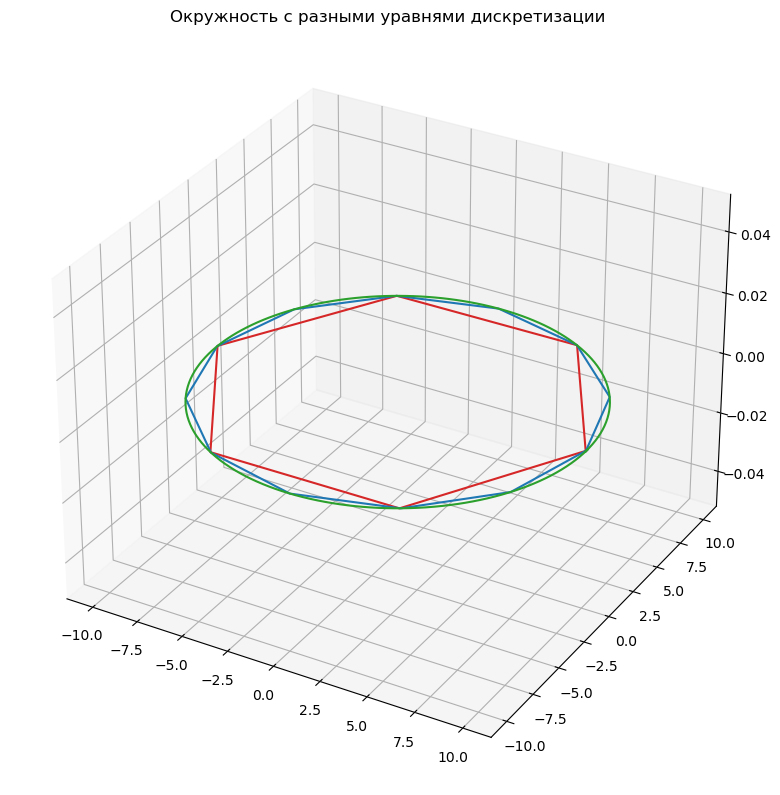

In [8]:
#Проверка функции автоматической записи точек.

fig = plt.figure(figsize=(10, 10), dpi=100)
axs1 = fig.add_subplot(111, projection='3d')
axs1.set_title("Окружность с разными уравнями дискретизации")



Object.MaxDevAng = (np.pi / 180.) * 30.
Object.CosMaxDevAng = math.cos(Object.MaxDevAng)

TestObject = Object([10.,0.,0.])

for i in range(0, 3620):
    ang = (i / 10.0) * np.pi / 180.0
    TestObject.Position[0] = 10.0 * math.cos(ang)
    TestObject.Position[1] = 10.0 * math.sin(ang)
    TestObject.UpdateTrajectory(i / 1.)
    
axs1.plot3D(TestObject.Trajectory[1], TestObject.Trajectory[2], TestObject.Trajectory[3], color="tab:red")



Object.MaxDevAng = (np.pi / 180.) * 15.
Object.CosMaxDevAng = math.cos(Object.MaxDevAng)

TestObject = Object([10.,0.,0.])

for i in range(0, 3620):
    ang = (i / 10.0) * np.pi / 180.0
    TestObject.Position[0] = 10.0 * math.cos(ang)
    TestObject.Position[1] = 10.0 * math.sin(ang)
    TestObject.UpdateTrajectory(i / 1.)
    
axs1.plot3D(TestObject.Trajectory[1], TestObject.Trajectory[2], TestObject.Trajectory[3], color="tab:blue")



Object.MaxDevAng = (np.pi / 180.)
Object.CosMaxDevAng = math.cos(Object.MaxDevAng)

TestObject = Object([10.,0.,0.])

for i in range(0, 3620):
    ang = (i / 10.0) * np.pi / 180.0
    TestObject.Position[0] = 10.0 * math.cos(ang)
    TestObject.Position[1] = 10.0 * math.sin(ang)
    TestObject.UpdateTrajectory(i / 1.)
    
axs1.plot3D(TestObject.Trajectory[1], TestObject.Trajectory[2], TestObject.Trajectory[3], color="tab:green")



Object.MaxDevAng = (np.pi / 180.) * 2.5
Object.CosMaxDevAng = math.cos(Object.MaxDevAng)

### Олтчично, класс проходит все тесты правильно, а значит можно двигаться дальше 

## Создание класса ObjectSystem - система объектов

1. Система должна уметь рассчитывать силу гравитационного взаимодействия, действующую на каждый отдельный объект
2. Система должна уметь итерировать систему, тоесть вычислять позиции объектов в течение какого-то временного промежутка
3. Система должна уметь расчитывать суммарный импульс системы и энергию, как критерий правильности вычислений
4. Система должна уметь выбирать промежуток времени в течение которого она будет считать силы постоянными
5. Должно быть много способов добавления объектов в систему:
    1. Добавление существующего объекта
    2. Добавление объекта по его параметрам
    3. Добавление объекта так, чтобы он гарантированно нашёл свою траекторию через:
        1. Период обращения
        2. Радиус орбиты
        3. Скорость движения
    4. Добавление объекта, который гарантированно станет центром системы
    5. Добавление объекта, который будет сравним с центром системы
    6. Добавление планет
    7. Добавление солнц
    8. Добавление спутников планет
    9. Добавление астероидов
6. Если центр масс системы не статичен, система должна уметь пересчитывать параметры системы так, чтобы он был статичен
7. Системы должна уметь анимировать движение её объектов
8. Система должна автоматически останавливать расчёт для объектов, находящихся далеко и гарантированно покинувшими систему

In [9]:
class ObjectSystem:
    
    MaxEnergyDiviation = 1.0E-7
    TimeStepCorrection = 2.5000
    
    #------------------------------------------------------------------------------------------------------------------------
    
    def ColorRGB(self, i):
        s = 0.7
        b = 0.5
        h = (i * np.pi) - (int(i * np.pi))

        color = colorsys.hsv_to_rgb(h,s,b)
        
        return color
    
    def Low_Accuracy(self):
        self.MaxEnergyDiviation = 1.0E-4
        
    def High_Accuracy(self):
        self.MaxEnergyDiviation = 1.0E-8
        
    def Normal_Accuracy(self):
        self.MaxEnergyDiviation = 1.0E-7
    
    #------------------------------------------------------------------------------------------------------------------------
    
    def __init__(self):
        self.objects = []
        self.calcfac = []
        
        self.dts   = []
        self.Ts = []
        
        self.T  = 0.00
        self.dt = 0.001
    
    #------------------------------------------------------------------------------------------------------------------------
    
    def Add_Object(self, obj):
        self.objects.append(obj)
        self.calcfac.append(True)
        
        if(np.linalg.norm(obj.Velocity) != 0):
            self.dts.append( 1.0 / (np.linalg.norm(obj.Velocity)**(1.5)) )
        else:
            self.dts.append(self.dt)
        self.Ts.append(self.T)
        
    def Add_Object_parameters(self, position, velocity, mass, radius):
        t_obj = Object(position, velocity, mass, radius)
        
        self.Add_Object(t_obj)
        
    def Add_Object_period(self, period, mass, radius, coef = 0.707):
        t_obj = Object()
        
        FullMass = 0;
        WeigMass = np.array([0, 0, 0]);
        for obj in self.objects:
            FullMass = FullMass + obj.Mass
            WeigMass = WeigMass + obj.Mass * obj.Position
        
        CMassVec = WeigMass / FullMass
        
        PositionMod = abs(( 0.5 * coef * coef * GravityConst * FullMass * ( (period/np.pi)**2 ) )**(1.0/3.0))
        VelocityMod = coef * math.sqrt(GravityConst*2*FullMass / PositionMod)
        #VelocityMod = ( 2.0 * np.pi / period ) * PositionMod
        
        AngAzi = random.random() * 2.0 * np.pi
        AngVer = random.random() * 2.0 * np.pi
        RanDir1 = np.array([math.cos(AngVer)*math.cos(AngAzi), math.cos(AngVer)*math.sin(AngAzi), math.sin(AngVer)])
        
        t_obj.Position = CMassVec + RanDir1 * PositionMod
        
        AngAzi = random.random() * 2.0 * np.pi
        AngVer = random.random() * 2.0 * np.pi
        RanDir2 = np.array([math.cos(AngVer)*math.cos(AngAzi), math.cos(AngVer)*math.sin(AngAzi), math.sin(AngVer)])
        
        PerDir = np.cross(RanDir1, RanDir2)
        PerDir = PerDir / np.linalg.norm(PerDir)
        
        t_obj.Velocity = VelocityMod * PerDir
        
        t_obj.Mass = mass
        t_obj.Radius = radius
        
        self.Add_Object(t_obj)
        
    def Add_Object_orbit(self, orbit_rad, mass, radius, coef = 0.707):
        FullMass = 0
        
        for obj in self.objects:
            FullMass = FullMass + obj.Mass
            
        period = (np.pi / coef) * math.sqrt(2.0 * orbit_rad * orbit_rad * orbit_rad / (GravityConst * FullMass))
        
        self.Add_Object_period(period, mass, radius, coef)
        
    def Add_Object_velocity(self, VelocityMod, mass, radius, coef = 0.707):
        FullMass = 0
        
        for obj in self.objects:
            FullMass = FullMass + obj.Mass
            
        period = 4.0 * np.pi * GravityConst * FullMass / (VelocityMod**3.0)
        
        self.Add_Object_period(period, mass, radius, coef)
        
    def Add_new_mass_center(self, radius, power=1.0, position=[0.,0.,0.], velocity=[0.,0.,0.]):
        FullMass = 0
        
        for obj in self.objects:
            FullMass = FullMass + obj.Mass
            
        mass = FullMass * (10**power)
        
        t_obj = Object(position, velocity, mass, radius)
        self.Add_Object(t_obj)
        
    #------------------------------------------------------------------------------------------------------------------------
        
    def Add_Planet_orbit(self, orbit_rad, radius, coef = 0.707):
        FullMass = 0
        
        for obj in self.objects:
            FullMass = FullMass + obj.Mass
            
        RanNum1 = random.random() * 10.
        RanNum2 = random.random() * 2.0 + 4.0
        
        mass = RanNum1*(FullMass / (10**RanNum2))
        
        self.Add_Object_orbit(orbit_rad, mass, radius, coef)
        
    def Add_Star_orbit(self, orbit_rad, radius, coef = 0.707):
        FullMass = 0
        
        for obj in self.objects:
            FullMass = FullMass + obj.Mass
            
        self.Add_Object_orbit(orbit_rad, FullMass, radius, coef)
        
    def Add_Satellite(self, obj, radius, coef = 0.707):
        FullMass = 0;
        WeigMass = np.array([0, 0, 0])
        
        for obj in self.objects:
            FullMass = FullMass + obj.Mass
            WeigMass = WeigMass + obj.Mass * obj.Position
        
        CMassVec = WeigMass / FullMass
        
        ObjRad = np.linalg.norm(obj.Position - CMassVec)
        
        MaxSatRad = 0.1 * obj.Mass * ObjRad / FullMass
        #MinSatRad = obj.Radius * 2.0
        MinSatRad = 0
        
        if(MaxSatRad <= MinSatRad):
            print("Cant Create Satellite")
            return
        
        SatRad = random.random()*(MaxSatRad - MinSatRad) + MinSatRad
        
        RanNum1 = random.random() * 10.
        RanNum2 = random.random() * 5.0 + 3.0
        
        SatMass = RanNum1 * (obj.Mass / (10**RanNum2))
        
        AngAzi = random.random() * 2.0 * np.pi
        AngVer = random.random() * 2.0 * np.pi
        RanDir1 = np.array([math.cos(AngVer)*math.cos(AngAzi), math.cos(AngVer)*math.sin(AngAzi), math.sin(AngVer)])
        
        SatPosition = obj.Position + RanDir1 * SatRad
        
        AngAzi = random.random() * 2.0 * np.pi
        AngVer = random.random() * 2.0 * np.pi
        RanDir2 = np.array([math.cos(AngVer)*math.cos(AngAzi), math.cos(AngVer)*math.sin(AngAzi), math.sin(AngVer)])
        
        PerDir = np.cross(RanDir1, RanDir2)
        PerDir = PerDir / np.linalg.norm(PerDir)
        
        SatVelocityMod = coef * math.sqrt(GravityConst * obj.Mass / SatRad)
        
        SatVelocity = PerDir * SatVelocityMod
        
        t_obj = Object(SatPosition, SatVelocity, SatMass, radius)
        self.Add_Object(t_obj)
        
    def Add_Asteroid(self, position, velocity, mass, radius):
        self.Add_Object(position, velocity, mass, radius)
        
    #------------------------------------------------------------------------------------------------------------------------
    
    def CalcForces(self):
        forces = [np.array([0.0,0.0,0.0])] * len(self.objects)
        for i in range(len(self.objects)):
            for q in range(i + 1, len(self.objects)):
                IForce = self.objects[i].CalcForce(self.objects[q])
                forces[i] = forces[i] + IForce
                forces[q] = forces[q] - IForce
        return forces
    
    def CalcEnergy(self):
        energy = 0;
        for i in range(len(self.objects)):
            energy = energy + 0.5 * self.objects[i].Mass * (np.linalg.norm(self.objects[i].Velocity)**2)
            for q in range(i + 1, len(self.objects)):
                energy = energy - 6.67E-11 * self.objects[i].Mass * self.objects[q].Mass / np.linalg.norm(self.objects[i].Position - self.objects[q].Position)
        return energy
    
    def CalcImpulse(self):
        impulse = np.array([0,0,0])
        for obj in self.objects:
            impulse = impulse + obj.Mass * obj.Velocity
        return impulse;
        
    #------------------------------------------------------------------------------------------------------------------------
    
    def Iteration(self):
        Forces = self.CalcForces()
        
        self.T = self.T + self.dt
        
        for i in range(len(self.objects)):
            
            while self.T > self.Ts[i] + self.dts[i]:
                
                Energy1 = self.CalcEnergy()
                
                self.objects[i].Velocity = self.objects[i].Velocity + (Forces[i] / self.objects[i].Mass) * self.dts[i]
                self.objects[i].Position = self.objects[i].Position + self.objects[i].Velocity * self.dts[i] + 0.5 * (Forces[i] / self.objects[i].Mass) * self.dts[i] * self.dts[i]
                self.objects[i].UpdateTrajectory(self.T)
                self.Ts[i] = self.Ts[i] + self.dts[i]
                
                Energy2 = self.CalcEnergy()
                
                EnergyDiviation = 2.0 * abs((Energy1 - Energy2) / (Energy1 + Energy2))
                
                if EnergyDiviation > self.MaxEnergyDiviation:
                    self.dts[i] /= self.TimeStepCorrection
                else:
                    self.dts[i] *= self.TimeStepCorrection
            
            self.dt = min(self.dts)
            if self.dt == 0:
                print("Oh no")
            
            
    def IterateTime(self, Time):
        Time = self.T + Time
        
        while self.T <= Time:
            self.Iteration()
            
        for obj in self.objects:
            obj.ForceUpdateTrajectory(self.T)
    
    #------------------------------------------------------------------------------------------------------------------------
    
    def DraftIteration(self):
        Energy1 = self.CalcEnergy()
        
        
        Forces = self.CalcForces()
        
        for i in range(len(self.objects)):
            self.objects[i].Velocity = self.objects[i].Velocity + (Forces[i] / self.objects[i].Mass) * self.dt
            self.objects[i].Position = self.objects[i].Position + self.objects[i].Velocity * self.dt + 0.5 * (Forces[i] / self.objects[i].Mass) * self.dt * self.dt
            self.objects[i].UpdateTrajectory(self.T)
            self.T = self.T + self.dt
        
        
        Energy2 = self.CalcEnergy()
        
        EnergyDiviation = 2.0 * abs((Energy1 - Energy2) / (Energy1 + Energy2))
        #print("Energy Diviation:", EnergyDiviation)
        if EnergyDiviation > self.MaxEnergyDiviation:
            self.dt /= self.TimeStepCorrection
        else:
            self.dt *= self.TimeStepCorrection
            
    def DraftIterateTime(self, Time):
        Time = self.T + Time
        
        while self.T <= Time:
            self.DraftIteration()
            
        for obj in self.objects:
            obj.ForceUpdateTrajectory(self.T)
        
    #------------------------------------------------------------------------------------------------------------------------
    
    def SimpleIteration(self, dt):
        Forces = self.CalcForces()
        
        for i in range(len(self.objects)):
            self.objects[i].Velocity = self.objects[i].Velocity + (Forces[i] / self.objects[i].Mass) * dt
            self.objects[i].Position = self.objects[i].Position + self.objects[i].Velocity * dt + 0.5 * (Forces[i] / self.objects[i].Mass) * dt * dt
            self.objects[i].UpdateTrajectory(self.T)
            self.T = self.T + dt
            
    def SimpleIterateTime(self, Time, dt):
        Time = self.T + Time
        
        while self.T <= Time:
            self.SimpleIteration(dt)
            
        for obj in self.objects:
            obj.ForceUpdateTrajectory(self.T)
            
    #------------------------------------------------------------------------------------------------------------------------    
    
    def print_objects(self):
        for obj in self.objects:
            obj.print()
    
    #------------------------------------------------------------------------------------------------------------------------
    
    def calc_draw_limits(self):
        FullMass = 0;
        WeigMass = np.array([0, 0, 0])
        
        for obj in self.objects:
            FullMass = FullMass + obj.Mass
            WeigMass = WeigMass + obj.Mass * obj.Position
        
        
        SystemCenter = WeigMass / FullMass
        
        XModAv = []
        YModAv = []
        ZModAv = []
        
        for i in range(len(self.objects)):
            obj = self.objects[i]
            
            X = obj.Trajectory[1]
            Y = obj.Trajectory[2]
            Z = obj.Trajectory[3]
            
            XModAv.append( max( abs(max(X) - SystemCenter[0]) , abs(min(X) - SystemCenter[0]) ) )
            YModAv.append( max( abs(max(Y) - SystemCenter[1]) , abs(min(Y) - SystemCenter[1]) ) )
            ZModAv.append( max( abs(max(Z) - SystemCenter[2]) , abs(min(Z) - SystemCenter[2]) ) )
            
        AvX = mean(XModAv) * 2.0
        AvY = mean(YModAv) * 2.0
        AvZ = mean(ZModAv) * 2.0
            
        Av = max(AvX, AvY, AvZ)
        
        self.DrawLimits = [[0.,0.],[0.,0.],[0.,0.]]
        
        self.DrawLimits[0] = [SystemCenter[0] - Av - 1, SystemCenter[0] + Av + 1]
        self.DrawLimits[1] = [SystemCenter[1] - Av - 1, SystemCenter[1] + Av + 1]
        self.DrawLimits[2] = [SystemCenter[2] - Av - 1, SystemCenter[2] + Av + 1]
    
    def draw(self):
        FullMass = 0;
        WeigMass = np.array([0, 0, 0])
        
        for obj in self.objects:
            FullMass = FullMass + obj.Mass
            WeigMass = WeigMass + obj.Mass * obj.Position
        
        
        SystemCenter = WeigMass / FullMass
        
        XModAv = []
        YModAv = []
        ZModAv = []
        
        
        fig = plt.figure(figsize=(10, 10), dpi=100)
        axs = fig.add_subplot(111, projection='3d')
        axs.set_title("Траектории Тел Системы")
        
        for i in range(len(self.objects)):
            obj = self.objects[i]
            
            X = obj.Trajectory[1]
            Y = obj.Trajectory[2]
            Z = obj.Trajectory[3]
            
            XModAv.append( max( abs(max(X) - SystemCenter[0]) , abs(min(X) - SystemCenter[0]) ) )
            YModAv.append( max( abs(max(Y) - SystemCenter[1]) , abs(min(Y) - SystemCenter[1]) ) )
            ZModAv.append( max( abs(max(Z) - SystemCenter[2]) , abs(min(Z) - SystemCenter[2]) ) )
            
            color = self.ColorRGB(i)
            
            Size = len(X)
            X1 = [X[Size - 1], X[Size - 2]]
            Y1 = [Y[Size - 1], Y[Size - 2]]
            Z1 = [Z[Size - 1], Z[Size - 2]]
            
            axs.plot3D(X, Y, Z, "--", color=color, linewidth=1.5)
            axs.scatter(X1, Y1, Z1, s=20, color=color)
            
            
        AvX = mean(XModAv) * 2.0
        AvY = mean(YModAv) * 2.0
        AvZ = mean(ZModAv) * 2.0
            
        Av = max(AvX, AvY, AvZ)
            
        axs.axes.set_xlim3d( SystemCenter[0] - Av - 1 , SystemCenter[0] + Av + 1 )
        axs.axes.set_ylim3d( SystemCenter[1] - Av - 1 , SystemCenter[1] + Av + 1 )
        axs.axes.set_zlim3d( SystemCenter[2] - Av - 1 , SystemCenter[2] + Av + 1 )
    
    def animate(self, time1, time2, frames, fps, trace_time = 1.0E+3):
        
        fig = plt.figure(figsize=(10, 10), dpi=100)
        axs = fig.add_subplot(111, projection='3d')
        axs.set_title("Траектории Тел Системы")
        
        camera = Camera(fig)
        
        self.calc_draw_limits()
        
        TimeStep = (time2 - time1) / frames
        
        for p in range(frames):
            time = time1 + TimeStep * p
            #axs.clear()
            for i in range(len(self.objects)):
                obj = self.objects[i]

                T  = obj.Trajectory[0][::-1]
                X1 = obj.Trajectory[1][::-1]
                Y1 = obj.Trajectory[2][::-1]
                Z1 = obj.Trajectory[3][::-1]

                L = -1;
                N = -1;

                for n in range(len(T)):    
                    if T[n] <= (time):
                        N = n + 1
                        break

                for n in range(N, len(T)):
                    if T[n] <= (time - trace_time):
                        L = n + 1
                        break
                        
                X = X1[N:][:L-N+1]
                Y = Y1[N:][:L-N+1]
                Z = Z1[N:][:L-N+1]

                if(L < 0):
                    break

                Xp = (X1[N + 1] - X1[N]) * (time - T[N]) / (T[N + 1] - T[N]) + X1[N]
                Yp = (Y1[N + 1] - Y1[N]) * (time - T[N]) / (T[N + 1] - T[N]) + Y1[N]
                Zp = (Z1[N + 1] - Z1[N]) * (time - T[N]) / (T[N + 1] - T[N]) + Z1[N]

                X.insert(0, Xp)
                Y.insert(0, Yp)
                Z.insert(0, Zp)

                XpAr = [Xp, Xp]
                YpAr = [Yp, Yp]
                ZpAr = [Zp, Zp]

                color = self.ColorRGB(i)
                
                axs.plot3D(X, Y, Z, "--", color=color, linewidth=1.5)
                axs.scatter(XpAr, YpAr, ZpAr, s=20, color=color)
            
            #axs.view_init(elev=25, azim=45+a)
            
            axs.axes.set_xlim3d( self.DrawLimits[0][0] , self.DrawLimits[0][1] )
            axs.axes.set_ylim3d( self.DrawLimits[1][0] , self.DrawLimits[1][1] )
            axs.axes.set_zlim3d( self.DrawLimits[2][0] , self.DrawLimits[2][1] )
            
            camera.snap()
            
        animation = camera.animate(interval=1000/fps)
        animation.save("Animation.gif", writer='ffmpeg')
        fig.clf()
        
        print("Animation saved as Animation.gif")
    
    #------------------------------------------------------------------------------------------------------------------------
        
    


## Начнём эксперементировать

### Построим систему Земля - Солнце:

In [10]:
random.seed(tm.asctime())

EarthSunSystem = ObjectSystem()
EarthSunSystem.Normal_Accuracy()

#Добавим солнце в нуль координат
EarthSunSystem.Add_Object_parameters([0.,0.,0.], [0.,0.,0.], 2E+30, 1.)

#Скажем системе самой создать планету на расстояние 1.5E+11 от центра масс (солнца) 
EarthSunSystem.Add_Planet_orbit(1.5E+11, 1.0, 0.707)

#Запустим симуляцию на один год
EarthSunSystem.IterateTime(63.2E+6)

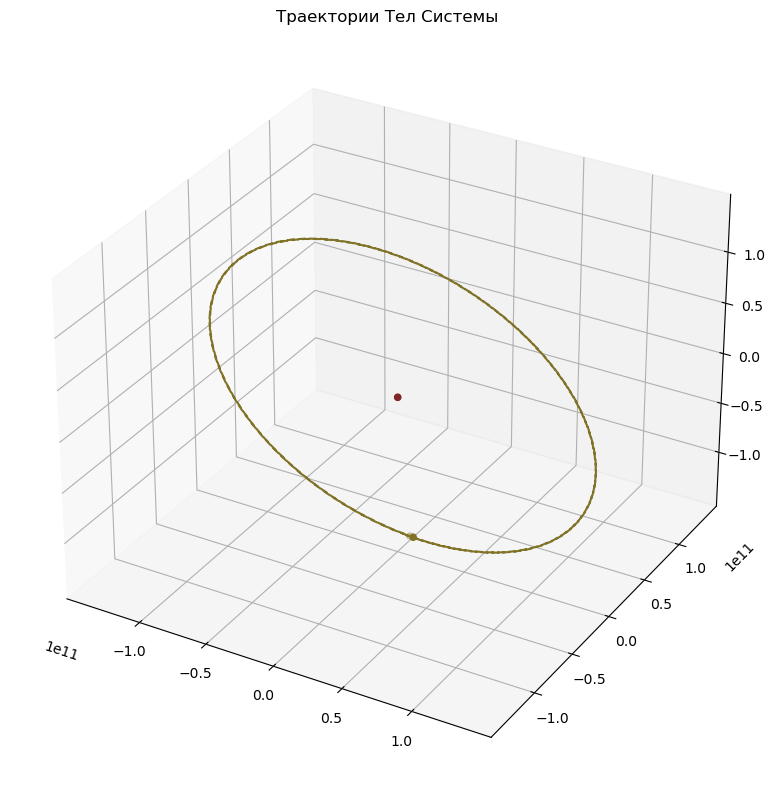

In [11]:
#Отрисуем систему с полными просчитанными траекториями
EarthSunSystem.draw()

In [12]:
#Анимируем движение этой системы
EarthSunSystem.animate(15.8E+6, 47.4E+6, 100, 30, 12.6E+6)

MovieWriter ffmpeg unavailable; using Pillow instead.


Animation saved as Animation.gif


<Figure size 1000x1000 with 0 Axes>

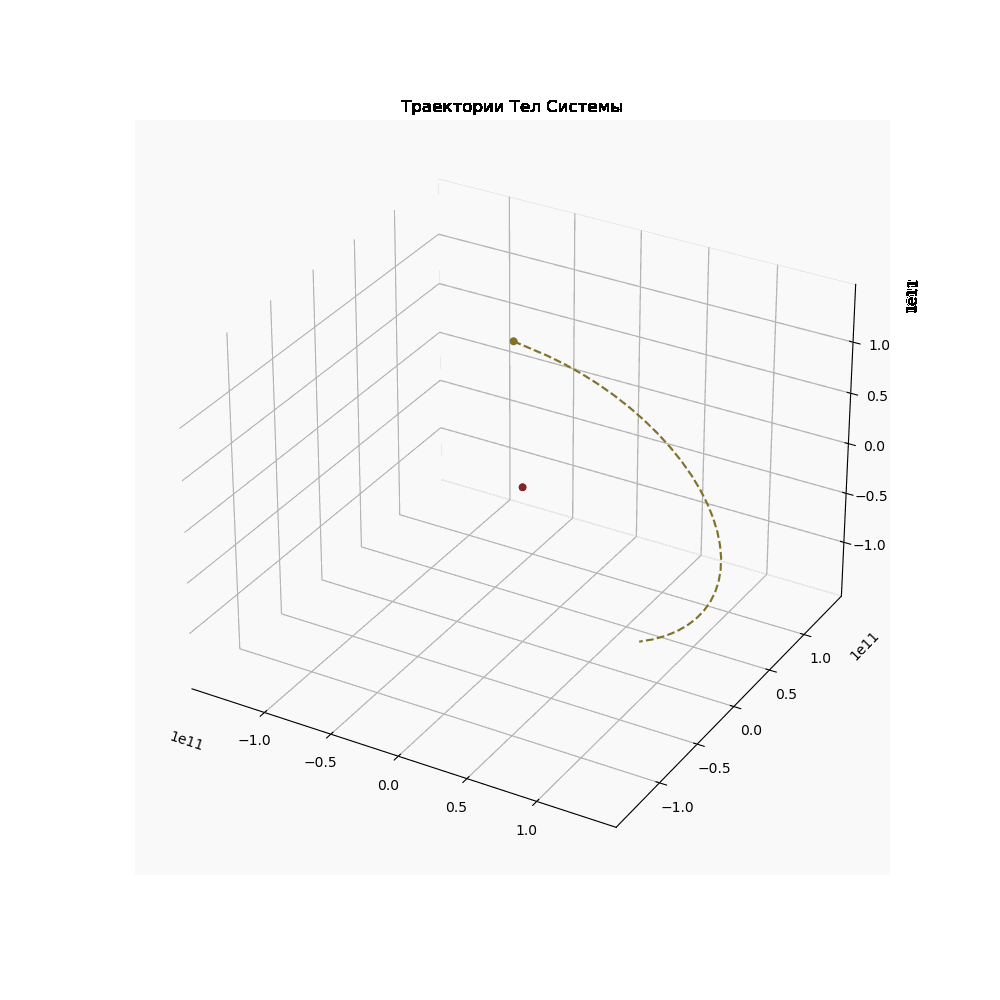

In [13]:
#Отобразим рисунок
Image(open('Animation.gif','rb').read())

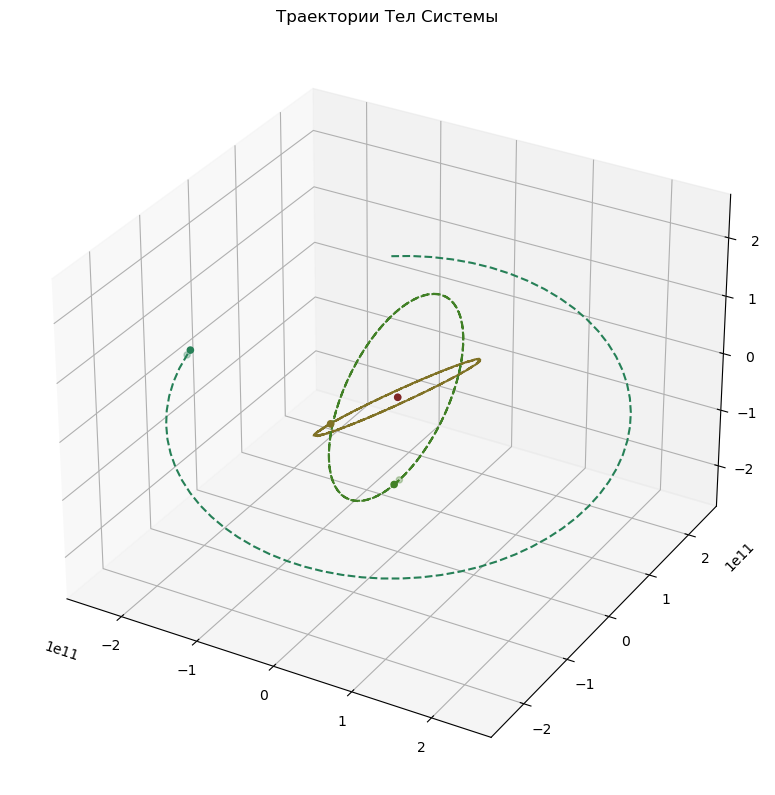

In [47]:
random.seed(512)

SolarSys = ObjectSystem()
SolarSys.Normal_Accuracy()

#Добавим солнце в нуль координат
SolarSys.Add_Object_parameters([0.,0.,0.], [0.,0.,0.], 2E+30, 1.)


SolarSys.Add_Planet_orbit( 57.9E+9, 1.0, 0.708)
SolarSys.Add_Planet_orbit(108.2E+9, 1.0, 0.708)
SolarSys.Add_Planet_orbit(149.6E+9, 1.0, 0.708)
SolarSys.Add_Planet_orbit(227.9E+9, 1.0, 0.756)


#Запустим симуляцию на один год
SolarSys.IterateTime(63.2E+6)

#Отрисуем систему с полными просчитанными траекториями
SolarSys.draw()
